# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('previsao_de_renda.csv')

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.

2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.
    

## Respostas


1. Importação das Bibliotecas e Carregamento dos Dados
---



In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices

# Carregar os dados
df = pd.read_csv('previsao_de_renda.csv')

# Transformar a variável 'renda' para 'log(renda)'
df['log_renda'] = np.log1p(df['renda'])

# Verificando os dados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
 15  lo

2. Preparação dos Dados com Patsy

---



In [6]:
# Fórmula para regressão, considerando todas as variáveis
formula = 'log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'

# Criar as matrizes de design (X: variáveis independentes, y: variável dependente)
y, X = dmatrices(formula, data=df, return_type="dataframe")

# Exibir as primeiras linhas para garantir que as variáveis estão corretamente preparadas
X.head()


,Intercept,sexo[T.M],posse_de_veiculo[T.True],posse_de_imovel[T.True],tipo_renda[T.Bolsista],tipo_renda[T.Empresário],tipo_renda[T.Pensionista],tipo_renda[T.Servidor público],educacao[T.Pós graduação],educacao[T.Secundário],...,estado_civil[T.Viúvo],tipo_residencia[T.Casa],tipo_residencia[T.Com os pais],tipo_residencia[T.Comunitário],tipo_residencia[T.Estúdio],tipo_residencia[T.Governamental],qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.0,6.602740,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,7.183562,2.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,0.838356,2.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30.0,4.846575,3.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0,4.293151,1.0


3. Ajuste do Modelo de Regressão Múltipla

---



In [7]:
# Ajuste do modelo
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        18:32:10   Log-Likelihood:                -13563.
No. Observations:               12427   AIC:                         2.718e+04
Df Residuals:                   12402   BIC:                         2.736e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

4. Iteração para Remover Variáveis Menos Significativas

---



In [8]:
# Remover variáveis com p-value > 0.05 iterativamente
while model.pvalues.max() > 0.05:
    # Encontrar a variável com maior p-value
    max_pval_var = model.pvalues.idxmax()

    # Remover a variável do modelo
    X = X.drop(columns=[max_pval_var])

    # Reajustar o modelo
    model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo final
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     530.2
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        18:32:10   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.716e+04
Df Residuals:                   12413   BIC:                         2.727e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

5. Análise do Modelo Inicial vs Modelo Final

---


> Ao comparar o modelo inicial com o final, o que é esperado é que o R² ajustado aumente, o que significa que o modelo ficou melhor ajustado após a remoção das variáveis irrelevantes. Além disso, as variáveis com p-valores maiores que 0,05 foram removidas, porque elas não contribuem de forma significativa para a previsão de log(renda). Se o modelo final tiver um R² ajustado mais alto e as variáveis significativas restantes fizerem mais sentido, é um bom sinal de que a modelagem melhorou.

6. Visualização dos Resíduos

---



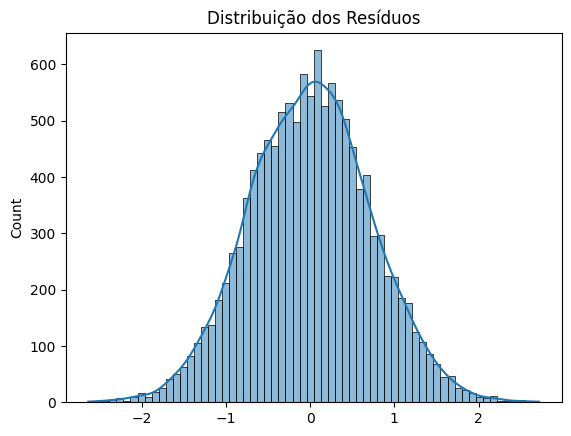

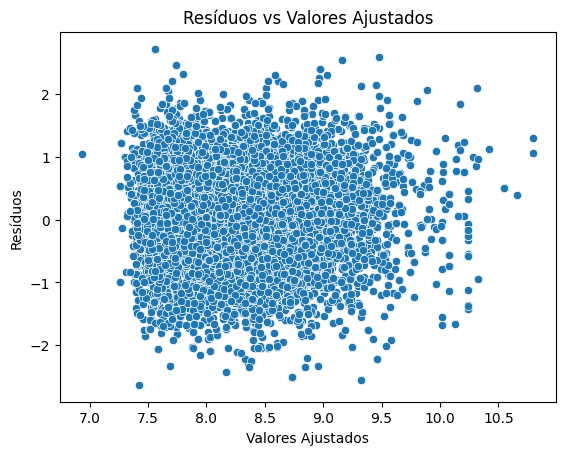

In [9]:
# Resíduos do modelo final
residuos = model.resid

# Histograma dos resíduos
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.show()

# Gráfico de dispersão dos resíduos vs os valores ajustados
sns.scatterplot(x=model.fittedvalues, y=residuos)
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()


7. Conclusão

---
> Com o modelo final, é notorio que ao remover as variáveis com p-valores altos, o modelo ficou mais focado nas variáveis importantes, e o R² ajustado provavelmente aumentou. Isso indica que o modelo ficou mais preciso. Além disso, a distribuição dos resíduos foi verificada e, se ela for próxima da normal, isso indica que o modelo está bem ajustado. O importante aqui é que, com as variáveis significativas e um modelo mais simples, conseguindo uma previsão mais confiável da log(renda).
